In [1]:
import random 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
df = pd.read_csv("final_data.csv")
df.head()


,Latitude,Longitude,altitude,Distance,Pitch angle,Velocity,Time(secs),Acceleration
0,37.285535,125.976853,390.00,806.0000,-166.714286,8.663723,605.5,14.308378
1,31.032830,-120.517269,10417.33,542.4081,-9.000000,886.000000,522.0,1697.318008
2,38.996693,127.494248,387.00,881.0000,-343.821429,7.812535,947.5,8.245419
3,32.001859,-120.193566,10412.03,422.1578,86.000000,883.000000,420.0,2102.380952
4,37.745461,128.352399,213.00,1142.0000,-380.071429,7.638315,1017.5,7.506944


In [3]:
df['Distance'].head()

0     806.0000
1     542.4081
2     881.0000
3     422.1578
4    1142.0000
Name: Distance, dtype: float64

In [4]:
df.describe()

,Latitude,Longitude,altitude,Distance,Pitch angle,Velocity,Time(secs),Acceleration
count,3.910000e+03,3.910000e+03,3910.000000,3902.000000,3910.000000,3910.000000,3910.000000,3910.000000
mean,1.131247e+08,-2.403995e+08,2056.650280,582.636565,-94.295771,287.647489,1490.799361,967.755631
std,1.931306e+08,4.104189e+08,3315.871233,508.927542,240.859106,362.381719,1127.952518,9114.591059
min,0.000000e+00,-9.409027e+08,0.000000,0.000000,-798.500000,5.000000,1.500000,3.082620
25%,3.465828e+01,-9.409027e+08,6.000000,187.000000,-233.000000,56.552500,639.125000,28.707108
50%,5.337791e+01,-1.181339e+02,720.390000,353.000000,-53.000000,103.315000,1275.750000,61.138669
75%,4.427601e+08,-1.132914e+02,1247.750000,920.677325,66.000000,880.000000,1955.750000,522.163902
max,4.427601e+08,1.296667e+02,10425.460000,2069.192000,359.400000,920.000000,4995.000000,441000.000000


In [5]:
df.count()

Latitude        3910
Longitude       3910
altitude        3910
Distance        3902
Pitch angle     3910
Velocity        3910
Time(secs)      3910
Acceleration    3910
dtype: int64

In [6]:
df['Distance'].fillna(585,inplace=True)
df.count()

Latitude        3910
Longitude       3910
altitude        3910
Distance        3910
Pitch angle     3910
Velocity        3910
Time(secs)      3910
Acceleration    3910
dtype: int64

In [7]:
df2=df.drop(['Latitude','Longitude','Time(secs)'],axis=1)


In [8]:
df2.head()

,altitude,Distance,Pitch angle,Velocity,Acceleration
0,390.00,806.0000,-166.714286,8.663723,14.308378
1,10417.33,542.4081,-9.000000,886.000000,1697.318008
2,387.00,881.0000,-343.821429,7.812535,8.245419
3,10412.03,422.1578,86.000000,883.000000,2102.380952
4,213.00,1142.0000,-380.071429,7.638315,7.506944


In [9]:
from sklearn.preprocessing import StandardScaler
X = df2.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.43938691, -0.300706  , -0.76996006, -0.10462008],
       [-0.07914621,  0.35417669,  1.65137757,  0.08005358],
       [ 0.58692553, -1.03611434, -0.77230923, -0.10528535],
       ...,
       [-0.88649344, -0.56348954, -0.27501452, -0.09515861],
       [-0.37109188,  1.12443499, -0.57909744, -0.0774391 ],
       [ 2.61048845,  0.51196545,  1.64309794, -0.05248167]])

In [10]:
# from sklearn.cluster import AgglomerativeClustering
# clustering = AgglomerativeClustering().fit(X)
# clustering
# labels=clustering.labels_
# labels

In [11]:
clusterNum = 4
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, 
                 n_init =15,max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, 
                 random_state=1234, copy_x=True, n_jobs=None, algorithm='auto')
k_means.fit(X)
labels = k_means.labels_
print(labels)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:970: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  "effect", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


[0 0 0 ... 0 0 0]


In [12]:
labels

array([0, 0, 0, ..., 0, 0, 0])

In [13]:
df2["Cluster"] = labels
df2.head(5)

,altitude,Distance,Pitch angle,Velocity,Acceleration,Cluster
0,390.00,806.0000,-166.714286,8.663723,14.308378,0
1,10417.33,542.4081,-9.000000,886.000000,1697.318008,0
2,387.00,881.0000,-343.821429,7.812535,8.245419,0
3,10412.03,422.1578,86.000000,883.000000,2102.380952,0
4,213.00,1142.0000,-380.071429,7.638315,7.506944,0


In [14]:
df2[df2["Cluster"]==3].count()

altitude        21
Distance        21
Pitch angle     21
Velocity        21
Acceleration    21
Cluster         21
dtype: int64

In [15]:
df2.groupby('Cluster').mean()
df2.head()
df2.to_csv('Clustered_df.csv')

In [16]:
df.columns

Index(['Latitude', 'Longitude', 'altitude', 'Distance', 'Pitch angle',
       'Velocity', 'Time(secs)', 'Acceleration'],
      dtype='object')

In [17]:
X

array([[ 806.        , -166.7142857 ,    8.6637227 ,   14.3083777 ],
       [ 542.4081    ,   -9.        ,  886.        , 1697.318008  ],
       [ 881.        , -343.8214286 ,    7.81253495,    8.24541947],
       ...,
       [ 132.        , -230.        ,  188.        ,  100.5347594 ],
       [ 394.        ,  176.5       ,   77.82      ,  262.020202  ],
       [1909.661     ,   29.        ,  883.        ,  489.4678492 ]])

In [18]:
df2.columns

Index(['altitude', 'Distance', 'Pitch angle', 'Velocity', 'Acceleration',
       'Cluster'],
      dtype='object')

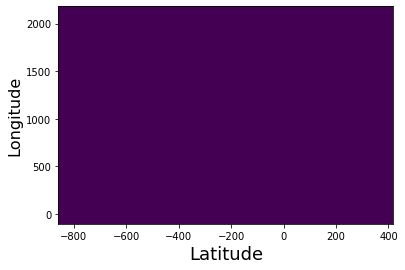

In [19]:
area = np.pi * ( X[:, 0])**2  
plt.scatter(X[:, 1], X[:, 0], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Latitude', fontsize=18)
plt.ylabel('Longitude', fontsize=16)

plt.show()

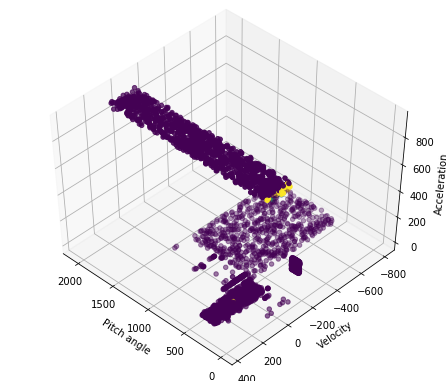

In [20]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .75, .85], elev=48, azim=134)

plt.cla()
ax.set_xlabel('Pitch angle')
ax.set_ylabel('Velocity')
ax.set_zlabel('Acceleration')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c= labels.astype(np.float))


In [21]:
# import seaborn as sns; sns.set(color_codes=True)
# df = sns.load_dataset('Clustered_df.csv')
# target = df.pop("Cluster")
# g = sns.clustermap(df)

In [22]:
import statsmodels.api as sm

In [23]:
df1 = pd.read_csv("Clustered_df.csv")
df1.head()

,Unnamed: 0,altitude,Distance,Pitch angle,Velocity,Acceleration,Cluster
0,0,390.00,806.0000,-166.714286,8.663723,14.308378,0
1,1,10417.33,542.4081,-9.000000,886.000000,1697.318008,0
2,2,387.00,881.0000,-343.821429,7.812535,8.245419,0
3,3,10412.03,422.1578,86.000000,883.000000,2102.380952,0
4,4,213.00,1142.0000,-380.071429,7.638315,7.506944,0


In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3910 entries, 0 to 3909
Data columns (total 7 columns):
Unnamed: 0      3910 non-null int64
altitude        3910 non-null float64
Distance        3910 non-null float64
Pitch angle     3910 non-null float64
Velocity        3910 non-null float64
Acceleration    3910 non-null float64
Cluster         3910 non-null int64
dtypes: float64(5), int64(2)
memory usage: 213.9 KB


In [25]:
df1.corr()

,Unnamed: 0,altitude,Distance,Pitch angle,Velocity,Acceleration,Cluster
Unnamed: 0,1.000000,0.011730,-0.004682,-0.006497,0.016020,-0.003677,0.015952
altitude,0.011730,1.000000,0.385070,0.211981,0.809366,0.044259,-0.016643
Distance,-0.004682,0.385070,1.000000,-0.120772,0.470009,-0.065849,-0.085593
Pitch angle,-0.006497,0.211981,-0.120772,1.000000,0.240112,0.039662,0.028343
Velocity,0.016020,0.809366,0.470009,0.240112,1.000000,0.152998,0.118572
Acceleration,-0.003677,0.044259,-0.065849,0.039662,0.152998,1.000000,0.461454
Cluster,0.015952,-0.016643,-0.085593,0.028343,0.118572,0.461454,1.000000


In [26]:
import seaborn as sns

In [27]:
df1.dropna(inplace=True)

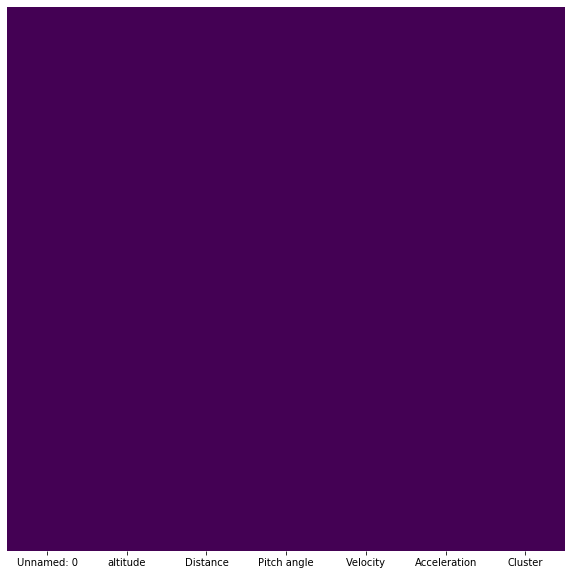

In [28]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.isnull(), yticklabels=False, cbar=False, cmap='viridis')

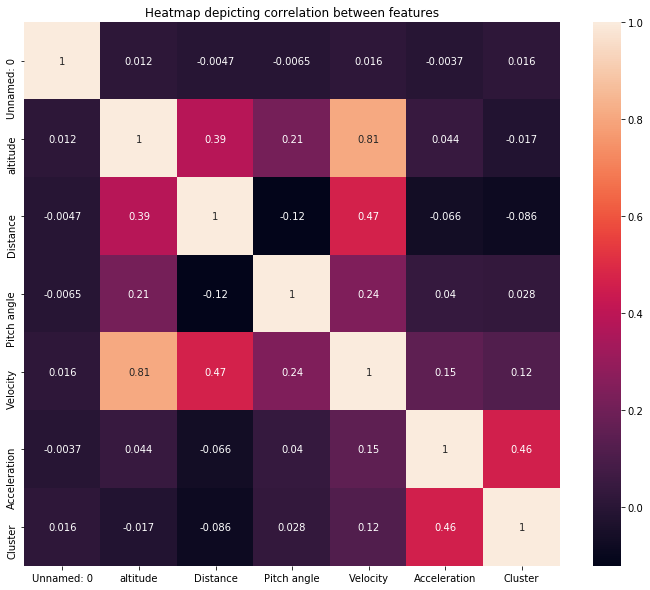

In [29]:
plt.figure( figsize = (12,10) )
sns.heatmap(df1.corr(), annot = True );
plt.title('Heatmap depicting correlation between features');

In [30]:
df1.head()

,Unnamed: 0,altitude,Distance,Pitch angle,Velocity,Acceleration,Cluster
0,0,390.00,806.0000,-166.714286,8.663723,14.308378,0
1,1,10417.33,542.4081,-9.000000,886.000000,1697.318008,0
2,2,387.00,881.0000,-343.821429,7.812535,8.245419,0
3,3,10412.03,422.1578,86.000000,883.000000,2102.380952,0
4,4,213.00,1142.0000,-380.071429,7.638315,7.506944,0


In [31]:
X_features=['Distance','Pitch angle','Velocity','Acceleration']
encoded_df=df1[X_features]

In [32]:
from sklearn.model_selection import train_test_split

X = encoded_df
Y = df1['Cluster']

train_X, test_X, train_y, test_y = train_test_split(X, Y, train_size = 0.8, random_state = 42)

In [33]:
model_1 = sm.OLS(train_y, train_X).fit()
model_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.185     
Dependent Variable:     Cluster          AIC:                         -1281.7696
Date:                   2020-08-03 14:49 BIC:                         -1257.5770
No. Observations:       3128             Log-Likelihood:              644.88    
Df Model:               4                F-statistic:                 178.7     
Df Residuals:           3124             Prob (F-statistic):          5.22e-138 
R-squared (uncentered): 0.186            Scale:                       0.038816  
------------------------------------------------------------------------------------
                  Coef.      Std.Err.        t        P>|t|       [0.025      0.975]
------------------------------------------------------------------------------------
Distance         -0.0000       0.0000     -5.9759     0.0000     -0.0001     -0.0000
Pitch angle      -0.0000       0.0000     -2.7363     0.0062     -0.0001     -0.0000
Velocity          0.0001       0.0000      7.1555     0.0000      0.0001      0.0001
Acceleration      0.0000       0.0000     23.5343     0.0000      0.0000      0.0000
--------------------------------------------------------------------------------
Omnibus:                4994.456          Durbin-Watson:             1.994      
Prob(Omnibus):          0.000             Jarque-Bera (JB):          3973144.208
Skew:                   10.098            Prob(JB):                  0.000      
Kurtosis:               176.426           Condition No.:             43         
================================================================================

"""

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def get_vif_factors( X ):
    X_matrix = X.values
    vif = [ variance_inflation_factor( X_matrix, i ) for i in range( X_matrix.shape[1] )]
    vif_factors = pd.DataFrame()
    vif_factors['column'] = X.columns
    vif_factors['VIF'] = vif
    return vif_factors

In [35]:
vif_factors = get_vif_factors(encoded_df[X_features])
vif_factors

,column,VIF
0,Distance,2.572561
1,Pitch angle,1.253318
2,Velocity,2.342681
3,Acceleration,1.058960


In [36]:
encoded_df.columns

Index(['Distance', 'Pitch angle', 'Velocity', 'Acceleration'], dtype='object')

In [37]:
from scipy.stats import pearsonr 

In [38]:
a = encoded_df.columns
for i in a:
    list1 = encoded_df[i] 
    list2 = df1['Cluster']
    corr, _ = pearsonr(list1, list2) 
    print('Pearsons correlation: %.3f  ' % corr, end="")
    print(i)

Pearsons correlation: -0.086  Distance
Pearsons correlation: 0.028  Pitch angle
Pearsons correlation: 0.119  Velocity
Pearsons correlation: 0.461  Acceleration


In [39]:
k=k_means.predict([[422.1578,86.000000,883.000000,2102.380952]])

In [40]:
dict={0:'Flight',1:'UAV',2:'Missile',3:'Helicopter'}
for i in k:
    print (dict[i])

Flight


In [41]:
k1 = k_means.predict([[0.190934, -7.0, 882.0, 441000.0]])

In [42]:
for i in k1:
    print (dict[i])

UAV


In [43]:
k2 = k_means.predict([[2.053248, 29.0, 901.0, 150166.6667]])

In [45]:
for i in k2:
    print (dict[i])
    

Missile


In [46]:
k3 = k_means.predict([[5.948554, -57.0, 884.00, 63142.85714]])

In [47]:
for i in k3:
    print (dict[i])

Helicopter


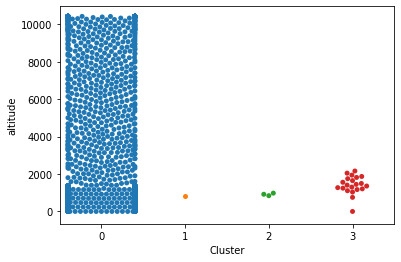

In [49]:
import seaborn as sns
sns.swarmplot(df2.Cluster,df2['altitude'])